<a href="https://colab.research.google.com/github/jhlee508/Colab/blob/master/Transfer_Learning_Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 라이브러리 불러오기

In [169]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from tensorflow import keras
from sklearn.model_selection import train_test_split

# 데이터 불러오기

In [170]:
fashion_mnist = keras.datasets.fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [171]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

# 데이터 전처리

In [172]:
# Normalization
X_train = X_train.astype("float64")/255
X_test = X_test.astype("float64")/255

In [173]:
# label 0과 1을 제외한 모든 데이터셋
X_train_A = X_train[(y_train >= 2)] 
y_train_A = y_train[(y_train >= 2)]
X_test_A = X_test[(y_test >= 2)]
y_test_A = y_test[(y_test >= 2)]

In [174]:
X_train_A.shape, y_train_A.shape, X_test_A.shape, y_test_A.shape

((48000, 28, 28), (48000,), (8000, 28, 28), (8000,))

In [175]:
# label 0과 1만을 가진 데이터들 중 앞에서 200개만 가진 데이터셋
X_train_B = X_train[(y_train == 0) | (y_train == 1)]
y_train_B = y_train[(y_train == 0) | (y_train == 1)]

X_test_B = X_test[(y_test == 0) | (y_test == 1)]
y_test_B = y_test[(y_test == 0) | (y_test == 1)]

In [176]:
X_train_B.shape, y_train_B.shape, X_test_B.shape, y_test_B.shape

((12000, 28, 28), (12000,), (2000, 28, 28), (2000,))

In [177]:
# train valid split
X_train_A, X_valid_A, y_train_A, y_valid_A = train_test_split(X_train_A, y_train_A, test_size=1/6, random_state = 42)
X_train_B, X_valid_B, y_train_B, y_valid_B = train_test_split(X_train_B, y_train_B, test_size=1/6, random_state = 42)

In [178]:
X_train_A.shape, y_train_A.shape, X_valid_A.shape, y_valid_A.shape, X_test_A.shape, y_test_A.shape

((40000, 28, 28), (40000,), (8000, 28, 28), (8000,), (8000, 28, 28), (8000,))

In [179]:
X_train_B.shape, y_train_B.shape, X_valid_B.shape, y_valid_B.shape

((10000, 28, 28), (10000,), (2000, 28, 28), (2000,))

In [180]:
X_train_B = X_train_B[:200]
y_train_B = y_train_B[:200]

In [181]:
X_train_B.shape, y_train_B.shape, X_valid_B.shape, y_valid_B.shape, X_test_B.shape, y_test_B.shape

((200, 28, 28), (200,), (2000, 28, 28), (2000,), (2000, 28, 28), (2000,))

In [182]:
X_train_A = X_train_A.reshape(X_train_A.shape[0], 28, 28, 1)
X_valid_A = X_valid_A.reshape(X_valid_A.shape[0], 28, 28, 1)
X_test_A = X_test_A.reshape(X_test_A.shape[0], 28, 28, 1)

X_train_A.shape, X_valid_A.shape, X_test_A.shape

((40000, 28, 28, 1), (8000, 28, 28, 1), (8000, 28, 28, 1))

In [183]:
X_train_B = X_train_B.reshape(X_train_B.shape[0], 28, 28, 1)
X_valid_B = X_valid_B.reshape(X_valid_B.shape[0], 28, 28, 1)
X_test_B = X_test_B.reshape(X_test_B.shape[0], 28, 28, 1)

X_train_B.shape, X_valid_B.shape, X_test_B.shape

((200, 28, 28, 1), (2000, 28, 28, 1), (2000, 28, 28, 1))

In [184]:
# Label 값 2~9에서 0~7로 바꾸기
y_train_A = y_train_A - 2
y_valid_A = y_valid_A - 2
y_test_A = y_test_A - 2

# X_train_A 학습(다중 분류)

In [185]:
# CNN 모델 라이브러리
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from keras.utils import to_categorical
from keras.models import Sequential

In [186]:
# 모델 define
model = Sequential()

model.add(Conv2D(32, kernel_size =(3, 3), input_shape = (28, 28, 1), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size = 2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(8, activation = 'softmax'))

model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_18 (Dense)             (None, 128)               1179776   
_________________________________________________________________
dropout_16 (Dropout)         (None, 128)             

In [187]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [188]:
history = model.fit(X_train_A, y_train_A,
          batch_size=128,
          epochs=20,
          verbose=1, 
          validation_data=(X_valid_A, y_valid_A))

Epoch 1/20
313/313 [==============================] - 5s 15ms/step - loss: 0.7305 - accuracy: 0.7295 - val_loss: 0.2953 - val_accuracy: 0.8950
Epoch 2/20
313/313 [==============================] - 5s 15ms/step - loss: 0.3335 - accuracy: 0.8797 - val_loss: 0.2480 - val_accuracy: 0.9106
Epoch 3/20
313/313 [==============================] - 5s 14ms/step - loss: 0.2853 - accuracy: 0.8986 - val_loss: 0.2253 - val_accuracy: 0.9211
Epoch 4/20
313/313 [==============================] - 5s 15ms/step - loss: 0.2442 - accuracy: 0.9120 - val_loss: 0.2226 - val_accuracy: 0.9235
Epoch 5/20
313/313 [==============================] - 5s 14ms/step - loss: 0.2303 - accuracy: 0.9166 - val_loss: 0.1959 - val_accuracy: 0.9295
Epoch 6/20
313/313 [==============================] - 5s 14ms/step - loss: 0.2074 - accuracy: 0.9246 - val_loss: 0.1897 - val_accuracy: 0.9330
Epoch 7/20
313/313 [==============================] - 5s 14ms/step - loss: 0.1889 - accuracy: 0.9317 - val_loss: 0.1876 - val_accuracy: 0.9300

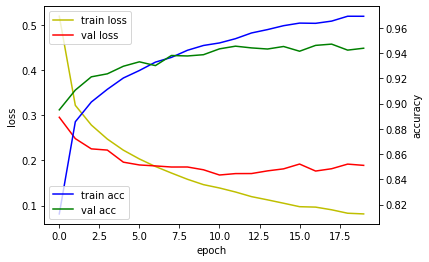

In [189]:
# 모델 학습 과정
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')

acc_ax.plot(history.history['accuracy'], 'b', label='train acc')
acc_ax.plot(history.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [190]:
score = model.evaluate(X_test_A, y_test_A, verbose = 0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.22115308046340942
Test accuracy: 0.9346250295639038


In [191]:
# 모델 저장하기
model.save('fashion_mnist_model.h5')

# X_train_B 전이학습(이진 분류) 

In [260]:
X_train_B = X_train_B.reshape(X_train_B.shape[0], 28, 28, 1)
X_valid_B = X_valid_B.reshape(X_valid_B.shape[0], 28, 28, 1)
X_test_B = X_test_B.reshape(X_test_B.shape[0], 28, 28, 1)

X_train_B.shape, X_valid_B.shape, X_test_B.shape

((200, 28, 28, 1), (2000, 28, 28, 1), (2000, 28, 28, 1))

In [261]:
# 모델 define
model = Sequential()

model.add(Conv2D(32, kernel_size =(3, 3), input_shape = (28, 28, 1), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size = 2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1, activation = 'sigmoid'))

model.summary()

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_22 (Dropout)         (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_17 (Flatten)         (None, 9216)              0         
_________________________________________________________________
dense_36 (Dense)             (None, 1)                 9217      
Total params: 28,033
Trainable params: 28,033
Non-trainable params: 0
_________________________________________________

In [262]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [263]:
history = model.fit(X_train_B, y_train_B,
          batch_size=128,
          epochs=20,
          verbose=1, 
          validation_data=(X_valid_B, y_valid_B))

Epoch 1/20
2/2 [==============================] - 1s 291ms/step - loss: 0.6907 - accuracy: 0.5167 - val_loss: 0.6281 - val_accuracy: 0.5095
Epoch 2/20
2/2 [==============================] - 0s 130ms/step - loss: 0.6119 - accuracy: 0.5723 - val_loss: 0.5535 - val_accuracy: 0.7995
Epoch 3/20
2/2 [==============================] - 0s 129ms/step - loss: 0.5278 - accuracy: 0.8190 - val_loss: 0.4549 - val_accuracy: 0.9345
Epoch 4/20
2/2 [==============================] - 0s 131ms/step - loss: 0.4401 - accuracy: 0.9451 - val_loss: 0.3503 - val_accuracy: 0.9485
Epoch 5/20
2/2 [==============================] - 0s 133ms/step - loss: 0.3370 - accuracy: 0.9544 - val_loss: 0.2694 - val_accuracy: 0.9445
Epoch 6/20
2/2 [==============================] - 0s 137ms/step - loss: 0.2605 - accuracy: 0.9444 - val_loss: 0.2192 - val_accuracy: 0.9460
Epoch 7/20
2/2 [==============================] - 0s 139ms/step - loss: 0.2095 - accuracy: 0.9503 - val_loss: 0.1968 - val_accuracy: 0.9470
Epoch 8/20
2/2 [====

In [264]:
# 모델 불러오기
from keras.models import load_model
model_A = load_model('fashion_mnist_model.h5')

In [266]:
model_B_on_A = Sequential(model_A.layers[:-1])
# model_B_on_A.add(Flatten())
# model_B_on_A.add(Dense(128, activation='relu'))
model_B_on_A.add(Dense(1, 'sigmoid'))

model_B_on_A.summary()

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_18 (Dense)             (None, 128)               1179776   
_________________________________________________________________
dropout_16 (Dropout)         (None, 128)             

In [245]:
for layer in model_B_on_A.layers[:-1]:
    layer.trainable = False

In [246]:
model_B_on_A.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [247]:
history = model_B_on_A.fit(X_train_B, y_train_B,
          batch_size=128,
          epochs=100,
          verbose=1, 
          validation_data=(X_valid_B, y_valid_B))

Epoch 1/100
2/2 [==============================] - 1s 283ms/step - loss: 0.6949 - accuracy: 0.5000 - val_loss: 0.6927 - val_accuracy: 0.5065
Epoch 2/100
2/2 [==============================] - 0s 135ms/step - loss: 0.6901 - accuracy: 0.5178 - val_loss: 0.6907 - val_accuracy: 0.5150
Epoch 3/100
2/2 [==============================] - 0s 138ms/step - loss: 0.6901 - accuracy: 0.5167 - val_loss: 0.6887 - val_accuracy: 0.5210
Epoch 4/100
2/2 [==============================] - 0s 147ms/step - loss: 0.6910 - accuracy: 0.4936 - val_loss: 0.6867 - val_accuracy: 0.5290
Epoch 5/100
2/2 [==============================] - 0s 145ms/step - loss: 0.6817 - accuracy: 0.5549 - val_loss: 0.6847 - val_accuracy: 0.5330
Epoch 6/100
2/2 [==============================] - 0s 150ms/step - loss: 0.6881 - accuracy: 0.5359 - val_loss: 0.6827 - val_accuracy: 0.5355
Epoch 7/100
2/2 [==============================] - 0s 142ms/step - loss: 0.6834 - accuracy: 0.5356 - val_loss: 0.6808 - val_accuracy: 0.5375
Epoch 8/100
2

In [267]:
for layer in model_B_on_A.layers[:-1]:
    layer.trainable = True

In [268]:
from keras.optimizers import Adam

model_B_on_A.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])

In [269]:
history = model_B_on_A.fit(X_train_B, y_train_B,
          batch_size=128,
          epochs=20,
          verbose=1, 
          validation_data=(X_valid_B, y_valid_B))

Epoch 1/20
2/2 [==============================] - 1s 302ms/step - loss: 0.9246 - accuracy: 0.5894 - val_loss: 0.4260 - val_accuracy: 0.8185
Epoch 2/20
2/2 [==============================] - 0s 145ms/step - loss: 0.5050 - accuracy: 0.7878 - val_loss: 0.1926 - val_accuracy: 0.9685
Epoch 3/20
2/2 [==============================] - 0s 142ms/step - loss: 0.2448 - accuracy: 0.9061 - val_loss: 0.1087 - val_accuracy: 0.9720
Epoch 4/20
2/2 [==============================] - 0s 140ms/step - loss: 0.1323 - accuracy: 0.9670 - val_loss: 0.0825 - val_accuracy: 0.9700
Epoch 5/20
2/2 [==============================] - 0s 142ms/step - loss: 0.1247 - accuracy: 0.9562 - val_loss: 0.0724 - val_accuracy: 0.9720
Epoch 6/20
2/2 [==============================] - 0s 145ms/step - loss: 0.0796 - accuracy: 0.9670 - val_loss: 0.0653 - val_accuracy: 0.9740
Epoch 7/20
2/2 [==============================] - 0s 137ms/step - loss: 0.0556 - accuracy: 0.9907 - val_loss: 0.0598 - val_accuracy: 0.9765
Epoch 8/20
2/2 [====